In [2]:
# This program will serve as a control for our project
# We use a least squares method to test our prediction
# Import packages
import numpy as np
import pandas as pd
import matplotlib as plt
import scipy.linalg


In [3]:
train = pd.read_excel('Training_Data.xlsx') # Loading in the training data
train.head() # Checking the contents of the file

Player  Minutes   FG%   3P%    FT%  REB  AST  STL  BLK   PF  PPG  \
0       AJ Green    614.3  42.3  40.8   89.5   64   30    9    4   49    5   
1     AJ Griffin    170.7  29.0  25.6  100.0   18    5    1    2    6    2   
2   Aaron Gordan   2296.8  55.6  29.0   65.8  471  259   56   45  142   14   
3  Aaron Nesmith   1994.7  49.6  41.9   78.1  275  108   65   49  241   12   
4  Aaron Wiggins   1227.9  56.2  49.2   78.9  186   86   56   19   91    7   

   Age  2024-25 Salary()  
0   24           2120693  
1   20            250000  
2   28          22841455  
3   24          11000000  
4   25          10514017

In [4]:
# Define an array X and a target vector y
X = np.array([train['Minutes'].values,
                 train['FG%'].values,
                 train['3P%'].values,
                 train['FT%'].values,
                 train['REB'].values,
                 train['AST'].values,
                 train['STL'].values,
                 train['BLK'].values,
                 train['PF'].values,
                 train['PPG'].values,
                 train['Age'].values])
X_new = X.astype(float)

# y is the target vector, which is the salary of the players
y = train['2024-25 Salary()'].values
# Change the array to be suitable for multiplication
y_new = np.array([y])
r = y_new.astype(float)
print(X_new.shape)
print(r.shape)

(11, 293)
(1, 293)


In [5]:
# Derive the coefficients 
z = np.transpose(r)
i = np.transpose(X_new)
print(i.shape)
beta, residuals, rank, s = scipy.linalg.lstsq(i,z)

# Ensuring that the array is in the proper dimension to multiply by the matrix
print("Coefficients (β):")
print(beta.shape)

beta_nu = np.transpose(beta)

print(beta_nu)

(293, 11)
Coefficients (β):
(11, 1)
[[  -3519.60815564 -119722.14590144   -7451.50073773  -88481.35267954
     9492.49499964    5719.42676544   37469.5968649    45573.48342718
   -21113.90457496 1496989.58316833  390847.13751732]]


In [6]:
#Lets see how accurate our results are based on the test_set
test = pd.read_excel('Test_Data.xlsx') # Loading in the training data
test.head() # Checking the contents of the file


Player  Minutes   FG%   3P%   FT%  REB  AST  STL  BLK   PF  PPG  \
0   Aaron Holiday   1269.3  44.6  38.7  92.1  123  140   42    6  125    7   
1      Al Horford   1739.8  51.1  41.9  86.7  413  168   38   62   93    9   
2      Alec Burks   1211.5  36.9  37.6  86.8  150   88   28   12   75   10   
3  Ausar Thompson   1582.8  48.3  18.6  59.7  402  120   68   59  175    9   
4    Ben Sheppard    814.3  39.3  31.4  88.5   89   53   33    2   88    4   

   Age  2024-25 Salary  
0   27         4668000  
1   38         9500000  
2   32         2087519  
3   21         8376000  
4   22         2663880

In [7]:
#Calculate the salaries using the least squares coefficients from the training data
T = np.array([test['Minutes'].values,
                 test['FG%'].values,
                 test['3P%'].values,
                 test['FT%'].values,
                 test['REB'].values,
                 test['AST'].values,
                 test['STL'].values,
                 test['BLK'].values,
                 test['PF'].values,
                 test['PPG'].values,
                 test['Age'].values])
#Make sufficient for multiplication
T_new = T.astype(float)

In [8]:
#Determine the predicted salaries by multiplying the stats in the testset with the coefficients from the model
sal = np.matmul(beta_nu,T_new)
print(sal)

[[ 3963470.32478855 15267402.0505267  12774565.40312063 10950495.04200944
   -431496.99797774 15137296.13446943 18312824.00775874 19598549.39261977
  23403631.58343201 19111995.72015439 26742535.86165104 16899420.16712847
  11334760.11135518 23724080.21999586 13025818.81869555 15639140.53429785
   3199390.16341934 11787569.77973681  9228718.25217608 13943814.166182
  17324715.96467844 33194650.62695155 10489133.65034986  8309362.96215249
  16486232.0611622   6916199.70727262 47008172.91235493  5763150.19285857
   5002063.9482164  19363134.98293919  4277050.04678904  5988053.16479875
  11261392.34626445  8241826.34411111 11734782.64577173  2850546.85273302
  21492508.6910897   2579356.0322963   5071390.97151556  5693159.5544269
  30268649.63096407 37476314.87606606 27240385.77532535  2139805.42905627
   6797091.70392296 30685969.28204214  5006320.52430498  6079161.10820686
  22319609.38991883  2996933.60503127  8752501.85685966 14718956.65007299
  11403281.81438044 10568790.08696071 177

In [9]:
#The following slides detail an analysis of Prediction Error
#Determining the percent error by comparing predicted salaries to testset salaries
act_sal = np.array([test['2024-25 Salary'].values])

#calculating percent error for each salary value

p_err = abs(((sal - act_sal)/act_sal))*100

#The average percent error 
print(np.average(p_err))



151.69307164964678


In [10]:
# Finding the cumulative error as well as the average error
# cumulative error
diff = sal - act_sal
abs_diff = abs(diff)
cum_diff = sum(abs_diff)
cum_error = sum(cum_diff)
print(cum_error)

#average error 
avg_error = (np.average(cum_diff))
print(avg_error)


579436162.1580317
5912613.899571753


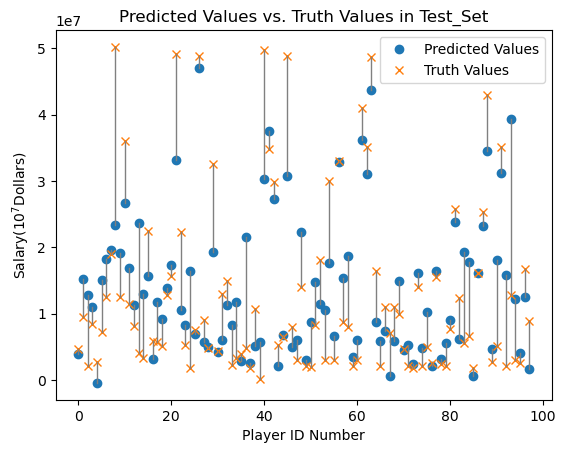

In [33]:
#Plotting the predicted values vs the truth values in the testset
import matplotlib.pyplot as plt

#Making the data suitable for plotting
sal_data = sum(sal)
act_sal_data = sum(act_sal)
#Establishing the range of values
indices = range(len(act_sal))
plt.title('Predicted Values vs. Truth Values in Test_Set')
plt.plot(sal_data,'o',label = 'Predicted Values')
plt.plot(act_sal_data,'x',label = 'Truth Values')
for i in range(len(sal_data)):
    plt.plot([i, i], [act_sal_data[i], sal_data[i]], color='gray', linestyle='-', linewidth=1)
plt.xlabel('Player ID Number')
plt.ylabel('Salary($10^{7}$Dollars)')
plt.legend()


In [12]:
#Analyzing the Data for efficiency of the training data
#This approach is analysis for a Test Set fit
tr_sal = np.matmul(beta_nu,X_new)

#compute average percent error for the training data
pt_err = (abs((tr_sal - r))/r)*100

print(np.average(pt_err))

96.36069792464527


In [13]:
#Computing the cumulative error and average error for the training data
diff_tr = abs(tr_sal - r)

#cumulative error
cum_tr_err = sum(sum(diff_tr))
print(cum_tr_err)

#average error
avg_tr_error = np.average(diff_tr)
print(avg_tr_error)

1549745986.6338263
5289235.449262207


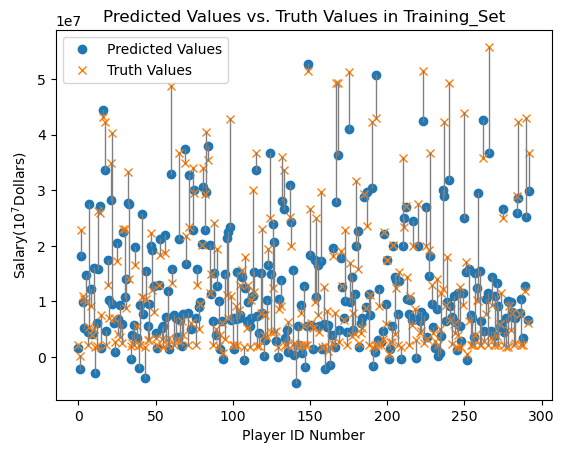

In [32]:
#Plotting the predicted values vs the truth values for the training data
act_tr_data = sum(r)
tr_sal_data = sum(tr_sal)

plt.title('Predicted Values vs. Truth Values in Training_Set')
plt.plot(tr_sal_data,'o',label = 'Predicted Values')
plt.plot(act_tr_data,'x',label = 'Truth Values')
#Create points that will connect each predicted value to its corresponding truth value
for i in range(len(tr_sal_data)):
    plt.plot([i, i], [act_tr_data[i], tr_sal_data[i]], color='gray', linestyle='-', linewidth=1)
plt.xlabel('Player ID Number')
plt.ylabel('Salary($10^{7}$Dollars)')
plt.legend()

In [ ]:
#Lets test a desired player that we want to see
#Bronny has the following makeup
Bronny = [2.6, 16.7, 0.0, 100, 0.2, 0.3, 0.2, 0.0, 0.3, 6, 20]

predicted_salary = np.dot(beta_nu, Bronny)

print(predicted_salary)
# The Least Squares Model suggests that Bronny will make $5,947,008 dollars based on his stats

[5947008.2386738]
